In [11]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

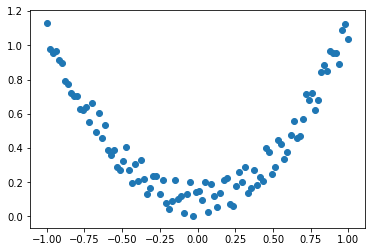

In [12]:
# init x, y 
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size()) # noisy y data (tensor), shape=(100, 1)

# 用 Variable 来修饰这些数据 tensor
x, y = Variable(x), Variable(y)

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [13]:
# build net
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
        
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x) # output時不需activation function
        return x


In [14]:
# implement net
net = Net(1, 10, 1)
print(net)

Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)


In [15]:
# compile net
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

In [6]:
# training
epoch = 100

parameters = []

for i in range(epoch):
    prediction = net.forward(x)
    
    loss = loss_func(prediction, y)
    
    # visualization

    optimizer.zero_grad() # set all gradient 2 zero
    loss.backward() # back propagation : update new gradient
    optimizer.step() # update parameters in net with optimized output

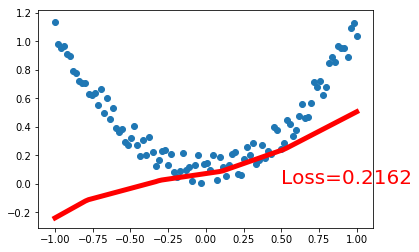

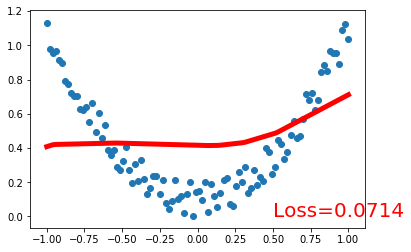

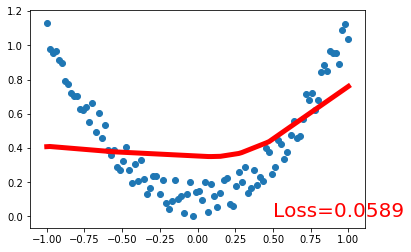

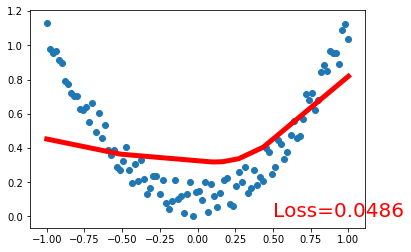

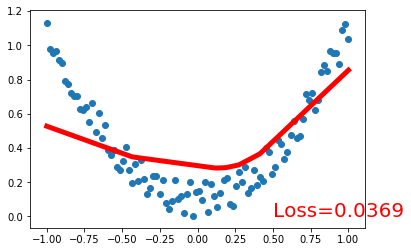

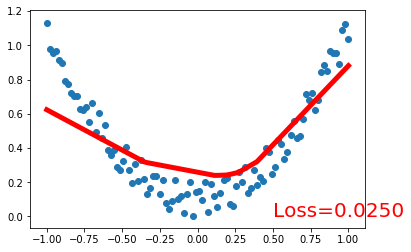

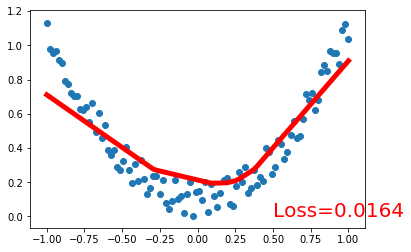

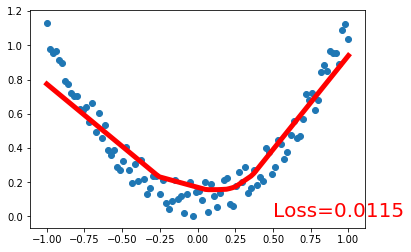

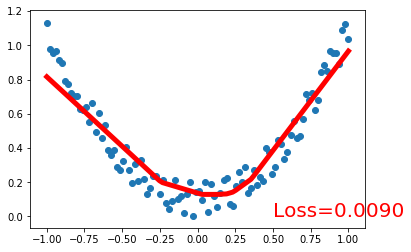

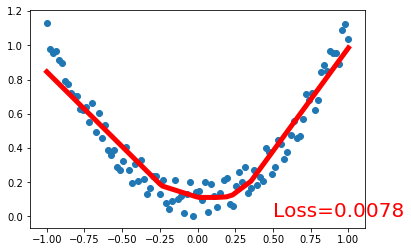

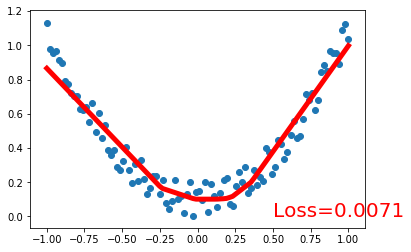

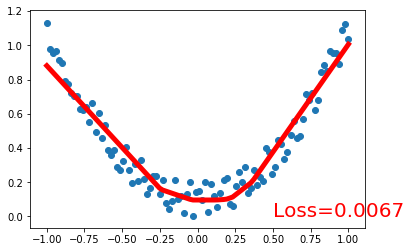

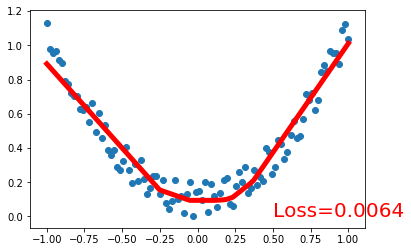

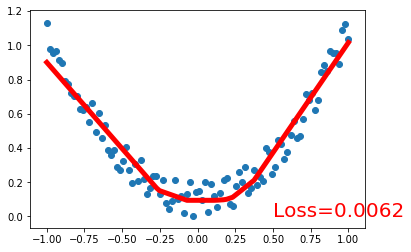

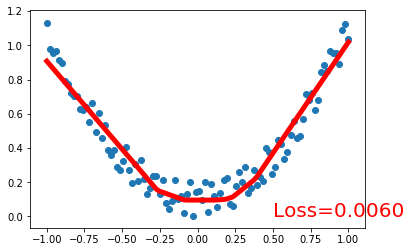

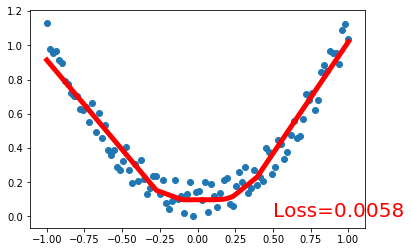

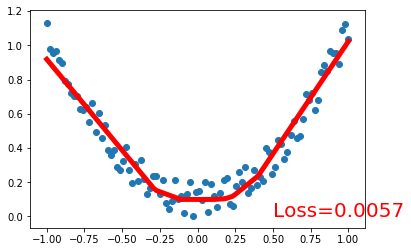

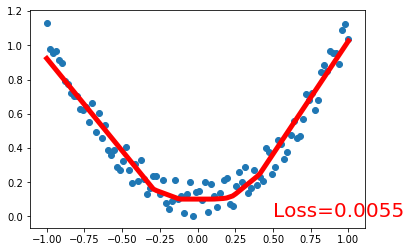

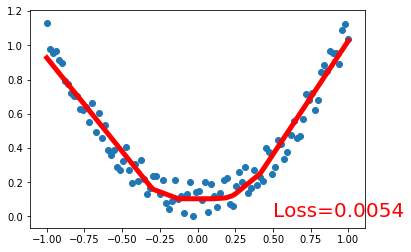

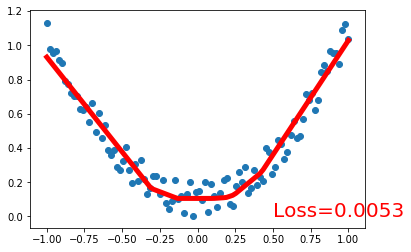

In [16]:
# training visualization
epoch = 100
grad = []

plt.ion()   # something about plotting

for t in range(100):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

In [17]:
grad

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [31]:
print(net.hidden.weight)
print(net.hidden.weight.backward)

Parameter containing:
-0.4262
 0.3503
 0.6594
-0.1349
-0.6018
 0.8229
 1.0692
 0.0988
-1.1172
-0.8898
[torch.FloatTensor of size 10x1]

<bound method Variable.backward of Parameter containing:
-0.4262
 0.3503
 0.6594
-0.1349
-0.6018
 0.8229
 1.0692
 0.0988
-1.1172
-0.8898
[torch.FloatTensor of size 10x1]
>


In [20]:
optimizer.param_groups

[{'dampening': 0,
  'lr': 0.5,
  'momentum': 0,
  'nesterov': False,
  'params': [Parameter containing:
   -0.4262
    0.3503
    0.6594
   -0.1349
   -0.6018
    0.8229
    1.0692
    0.0988
   -1.1172
   -0.8898
   [torch.FloatTensor of size 10x1], Parameter containing:
   -0.9852
   -0.0366
   -0.1252
   -0.6192
   -0.0829
   -0.1996
   -0.4591
   -0.0072
   -0.3524
   -0.8928
   [torch.FloatTensor of size 10], Parameter containing:
    0.2263  0.1554  0.3670 -0.0850  0.5618  0.5186  0.5772  0.0428  0.7022 -0.2777
   [torch.FloatTensor of size 1x10], Parameter containing:
    0.1069
   [torch.FloatTensor of size 1]],
  'weight_decay': 0}]

In [15]:
optimizer.

Parameter containing:
-0.2131
-1.0203
-1.1987
-0.0738
 0.2909
-0.0427
-0.7957
 1.0576
 0.1419
-0.2349
[torch.FloatTensor of size 10x1]

In [16]:
net.hidden.bias

Parameter containing:
-0.7346
-0.1562
-0.6651
-0.5785
-0.5297
-0.3005
-0.9906
-0.1964
-0.9391
-1.0056
[torch.FloatTensor of size 10]